# BookBrief 

A novel interpretation application powered by Language Models integrated with Knowledge Graphs. In this project we use the publicly available novels from [Project Gutenberg](https://www.gutenberg.org/) for research purposes. 

## Objective
* Understand the themes of Novels based on Topic Modelling using LDA
* Create a Knowledge graph of novels using topic distribution similarities

#### Next Steps: 
* Create sketches from the novels to depict the story pictorially using text to image models
* Develop a Conversational Agent for user interaction

In [22]:
# Install necessary libraries
# !pip install transformers
# !pip install torch
#!pip install spacy

import torch
from transformers import BertTokenizer, BertModel
from transformers import pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim import models
import nltk
import spacy
import pybmoore
import os
import networkx as nx
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

/Users/akshaybharadwaj/anaconda3/lib/python3.11/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/akshaybharadwaj/anaconda3/lib/python3.11/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/akshaybharadwaj/anaconda3/lib/python3.11/site-packages/seaborn/cm.py:1582: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/Users/akshaybharadwaj/anaconda3/lib/python3.11/site-packages/seaborn/cm.py:1583: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.reg

## Data Cleaning

In [4]:
# Load all data
data_folder = 'Datasets/'
def load_data(data_folder):
    txt_list = []
    data_files = [f for f in os.listdir(data_folder) if f.endswith('.txt')]
    # Open the file in read mode
    for i in data_files:
        with open(data_folder+i, 'r') as file:
            # Read the entire content of the file
            content = file.read()
            txt_list.append(content)
    return txt_list
    

In [5]:
# Function to remove preface from Novel text
def get_novel_start(text):
    start_index = pybmoore.search("***\n", text)
    return text[start_index[0][1]:]


In [6]:
# Function to perform data cleaning
# remove punctuations, stop words
def data_clean(txt):
    # Tokenize
    tokens = word_tokenize(txt)
    # stop word removal
    filtered_txt = [word.lower() for word in tokens if not word.lower()in stop_words]
    # lemmatization
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(str(t.lower())) for t in filtered_txt if t.isalpha()]
    return tokens
    
    

In [34]:
nlp = spacy.load('en_core_web_sm')

# Stopworld removal
stop_words = set(stopwords.words('english'))
custom_stop_words = ["would", "could", "said", "like", "one"]
stop_words = stop_words.union(custom_stop_words)


In [9]:
# Load all novel files
novel_files = load_data(data_folder)

# Remove preface from novel text
novel_txt = [get_novel_start(t) for t in novel_files]
# Clean novel text
cleaned_txt = [data_clean(txt) for txt in novel_txt]


## Exploratory Data Analysis

#### Word Frequency Analysis

In [44]:
word_freq = Counter(cleaned_txt[0])
most_common_words = word_freq.most_common(10)


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

words, counts = zip(*most_common_words)
sns.barplot(x=counts, y=words)
plt.title("Most Common Words in the Novel")
plt.show()


AttributeError: 'bool' object has no attribute 'all'

### Topic Modelling - Latent Dirichlet Allocation

In [10]:
# Create Bag ofwords for LDA
dictionary = Dictionary(cleaned_txt)
corpus = [dictionary.doc2bow(txt) for txt in cleaned_txt]

In [11]:
# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Explore topics
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)

(0, '0.007*"upon" + 0.006*"whale" + 0.004*"time"')
(1, '0.007*"valancy" + 0.005*"lady" + 0.004*"elizabeth"')
(2, '0.006*"little" + 0.005*"jo" + 0.004*"know"')


In [12]:
# pip install "pandas<2.0.0"
lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

#### Visualization of Topics

In [16]:
pyLDAvis.enable_notebook()
lda_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.048181  0.052336       1        1  42.457112
0      0.091364  0.001944       2        1  34.873111
1     -0.043182 -0.054281       3        1  22.669777, topic_info=            Term         Freq        Total Category  logprob  loglift
16788    valancy   955.000000   955.000000  Default  30.0000  30.0000
10743      whale  1266.000000  1266.000000  Default  29.0000  29.0000
7307          jo  1366.000000  1366.000000  Default  28.0000  28.0000
24002    lydgate   961.000000   961.000000  Default  27.0000  27.0000
1841   elizabeth   709.000000   709.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
3525        miss   336.272186  1047.355314   Topic3  -6.0121   0.3480
3378        make   337.860157  1450.377915   Topic3  -6.0074   0.0272
3430         may   336.510983  1407.836957   Topic3  -6.0114   0.0530
3384         man   340.999650  1979.932403   Topic3  -5.9982  -0.2748
2242       first   331.873839  1223.584367   Topic3  -6.0253   0.1794

[241 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
15570      1  0.134411        abel
15570      2  0.007074        abel
15570      3  0.855986        abel
8641       1  0.029664  adventurer
8641       2  0.967057  adventurer
...      ...       ...         ...
6127       2  0.504997         yet
6127       3  0.204775         yet
6132       1  0.541275       young
6132       2  0.254480       young
6132       3  0.203584       young

[418 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

### Sentiment Analysis

In [30]:
from textblob import TextBlob

sentiment_scores = []
sentences = [nltk.sent_tokenize(txt) for txt in novel_txt]
for sentence in sentences:
    print(sentence)
    sentiment_scores.append(TextBlob(sentence[0]).sentiment.polarity)

avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
print(f"Average Sentiment Polarity: {avg_sentiment}")


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



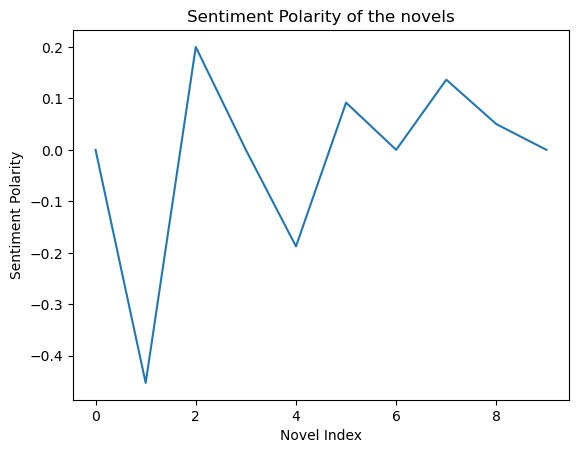

In [32]:
plt.plot(sentiment_scores)
plt.title("Sentiment Polarity of the novels")
plt.xlabel("Novel Index")
plt.ylabel("Sentiment Polarity")
plt.show()


### Named Entity Recognition

In [49]:
named_entities = {}
docs = [nlp(txt[0]) for txt in cleaned_txt]
for doc in docs:
    for ent in doc.ents:
        print(ent.text, ent.label_)
        named_entities[ent.text] = ent.label_


frankenstein PERSON


### Dashboard

In [42]:
#!pip install streamlit

  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 44.9 MB/s eta 0:00:00a 0:00:01
Using cached blinker-1.8.2-py3-none-any.whl (9.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [51]:
import streamlit as st

st.title("Analysis of Novels")
# st.bar_chart(word_freq)
st.line_chart(sentiment_scores)
st.text("Top Named Entities:")
for ent, label in named_entities.items():
    st.text(f"{ent}: {label}")


## Novel Universe

A graphical representation of Novel collection

In [14]:
novel_lists = {f: t for f, t in zip(os.listdir(data_folder), cleaned_txt) if f.endswith('.txt')}

In [12]:
# Create a knowledge graph
G = nx.Graph()

In [13]:
# Function to calculate similarity score
def get_similarity_score(lda_doc_topic_dist1, lda_doc_topic_dist2):
    # Reshape to 2D arrays    
    print("reshape")
    
    # Normalize the distributions to have the same length
    max_length = max(len(lda_doc_topic_dist1), len(lda_doc_topic_dist2))

    lda_doc_topic_dist1 = np.pad(lda_doc_topic_dist1, (0, max_length - len(lda_doc_topic_dist1)))
    lda_doc_topic_dist2 = np.pad(lda_doc_topic_dist2, (0, max_length - len(lda_doc_topic_dist2)))

    # Normalize to sum to 1
    lda_doc_topic_dist1 /= lda_doc_topic_dist1.sum()
    lda_doc_topic_dist2 /= lda_doc_topic_dist2.sum()
    
    # Calculate cosine similarity
#     similarity_score = cosine_similarity(lda_doc_topic_dist1, lda_doc_topic_dist2)[0, 0]
    similarity_score = cosine_similarity(lda_doc_topic_dist1.reshape(1, -1), lda_doc_topic_dist2.reshape(1, -1))[0, 0]
    print("Cosine Similarity:", similarity_score)
    return similarity_score


In [14]:
# Add nodes
for novel_id, novel_text in novel_lists.items():
    G.add_node(novel_id, text=novel_text)

# Add edges based on topic similarity
threshold_similarity = 0.7  
for novel1_id, novel1_text in novel_lists.items():
    for novel2_id, novel2_text in novel_lists.items():
        if novel1_id != novel2_id:
            print(lda_model.get_document_topics(dictionary.doc2bow(novel1_text)))
            similarity_score = get_similarity_score(lda_model.get_document_topics(dictionary.doc2bow(novel1_text)),lda_model.get_document_topics(dictionary.doc2bow(novel2_text)))
            if similarity_score > threshold_similarity:
                G.add_edge(novel1_id, novel2_id, weight=similarity_score)

# Visualization 
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=500, font_family='sans-serif')
plt.show()

[(0, 0.8219536), (1, 0.17803943)]
reshape
Cosine Similarity: 0.8237895905059831
[(0, 0.8217335), (1, 0.1782596)]
reshape


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 9 while Y.shape[1] == 6

### Building a Text Summarization Model

In [2]:
# Step 1: Data Preprocessing
document = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

# Step 2: Model Initialization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [3]:
# Step 3: Tokenization and Embeddings
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(document)))
inputs = tokenizer.encode(document, return_tensors='pt')
outputs = model(inputs)


In [5]:
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.8836, -0.7733, -0.1473,  ...,  0.9692,  0.8788,  0.2059],
         [-0.0027, -0.4005, -0.3993,  ...,  0.1571,  0.6346, -0.8572],
         [-0.2760, -0.5945, -0.4469,  ..., -0.2481, -0.5859, -0.7475],
         ...,
         [-0.3651, -0.1551,  1.4357,  ...,  0.1421,  0.1489, -0.0172],
         [-1.2886, -0.4607, -0.2328,  ...,  0.6383,  0.1956,  0.5542],
         [-0.5048, -0.7390, -0.1667,  ...,  0.9341,  0.3381, -0.5294]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-4.3196e-01, -3.0891e-01, -9.2646e-01,  2.4940e-01,  8.5553e-01,
         -2.0306e-01, -8.5499e-01,  3.3639e-01, -7.6259e-01, -9.9974e-01,
         -7.2241e-01,  9.2551e-01,  9.3311e-01,  5.1552e-01,  4.6698e-01,
         -2.1676e-01,  3.8613e-01, -4.1546e-01,  2.8038e-01,  9.6927e-01,
          1.8425e-01,  1.0000e+00, -3.5066e-02,  3.1028e-01,  3.5942e-01,
          9.3106e-01, -3.6263e-01,  6.7343e-01,  7.9832e-01,  7.127

In [10]:
# Step 4: Extract Sentence Embeddings
# For simplicity, let's use the average of the embeddings for each sentence
sentence_embeddings = torch.mean(outputs.last_hidden_state, dim=1)
print(type(sentence_embeddings))
# Step 5: Similarity Matrix
similarity_matrix = cosine_similarity(sentence_embeddings.detach().numpy())


<class 'torch.Tensor'>


In [11]:
sentence_embeddings

tensor([[-2.7395e-01, -2.8429e-01,  2.5540e-01, -1.0807e-01,  5.0634e-01,
          1.1414e-01,  4.1893e-02,  3.1748e-01,  9.6120e-03,  1.1810e-01,
          1.3790e-01, -3.3080e-01, -3.1538e-01,  1.4373e-01, -6.9151e-02,
          3.2298e-01,  3.9617e-01,  1.2930e-01, -1.1617e-01,  2.4083e-01,
          4.5823e-01,  4.2635e-03,  5.1613e-02,  6.3743e-01,  4.4394e-01,
          4.7955e-02, -1.5074e-01, -1.7193e-01, -2.3810e-01, -1.7740e-01,
          6.2615e-01,  8.6684e-03, -1.5746e-01, -3.1442e-01,  1.7063e-01,
         -1.2702e-02, -1.1546e-01, -3.5008e-01, -9.6040e-02,  2.2954e-01,
         -6.2116e-01, -2.3503e-01, -3.7346e-01, -9.0931e-02,  6.5957e-02,
         -9.9102e-02,  5.8014e-01, -1.0260e-01, -9.6979e-03,  2.0172e-01,
         -3.5569e-01,  1.5381e-01,  6.9391e-02, -5.7870e-02,  5.0542e-01,
          5.6688e-01, -4.7271e-01, -6.3074e-01, -3.7004e-01, -2.1789e-01,
          2.0674e-01, -6.9749e-02,  3.8112e-01, -6.1736e-01,  2.3524e-01,
         -2.6361e-02,  1.0371e-01,  5.

In [12]:
similarity_matrix

array([[0.99999994]], dtype=float32)

In [13]:
# Step 6: Rank Sentences by Similarity
sentence_scores = similarity_matrix.sum(axis=1)



In [14]:
# Step 7: Extract Top Sentences as Summary
num_sentences_in_summary = 3  # Adjust based on desired summary length
top_sentence_indices = sentence_scores.argsort()[-num_sentences_in_summary:][::-1]
summary = ' '.join([tokenizer.decode(inputs[0][idx].numpy()) for idx in sorted(top_sentence_indices)])

# Print the summary
print("Original Document:")
print(document)
print("\nExtractive Summary:")
print(summary)


Original Document:
 New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leavin

## Chapter-Wise Text Summarization

In [1]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")


In [2]:
# Specify the path to your text document
file_path = 'Datasets/Frankenstein.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read the entire content of the file
    content = file.read()

# Print or use the content as needed
print(content)


﻿The Project Gutenberg eBook of Frankenstein; Or, The Modern Prometheus
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Frankenstein; Or, The Modern Prometheus


Author: Mary Wollstonecraft Shelley

Release date: October 1, 1993 [eBook #84]
                Most recently updated: December 2, 2022

Language: English

Credits: Judith Boss, Christy Phillips, Lynn Hanninen and David Meltzer. HTML version by Al Haines.
        Further corrections by Menno de Leeuw.


*** START OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN; OR, THE MODERN PROMETHEUS ***



Frankenstein;

or, the Modern Promethe

In [3]:

print(summarizer(content, min_length=30, do_sample=False))


Token indices sequence length is longer than the specified maximum sequence length for this model (106392 > 1024). Running this sequence through the model will result in indexing errors


IndexError: index out of range in self

In [ ]:

def process_batch(batch):
    # Perform inference on the batch using your transformer model
    # Replace this with your actual inference code
    predictions = transformer_model_inference(batch)
    return predictions

# Example list of batches (replace with your actual data)
text_batches = [...]

# Use ThreadPoolExecutor for parallel processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit the processing tasks for each batch
    future_to_batch = {executor.submit(process_batch, batch): batch for batch in text_batches}

    # Process the results as they become available
    results = []
    for future in concurrent.futures.as_completed(future_to_batch):
        batch = future_to_batch[future]
        try:
            predictions = future.result()
            # Perform post-processing or save results as needed
            results.append((batch, predictions))
        except Exception as e:
            print(f"Error processing batch {batch}: {e}")

# Sort the results based on the original order of batches
results_sorted = sorted(results, key=lambda x: text_batches.index(x[0]))
